In [4]:
# ============================================
# BLOQUE 1.1 - IMPORTACIÓN DE LIBRERÍAS ESPECÍFICAS PARA MODELADO
# ============================================

import pandas as pd
import numpy as np
import os  # <- Esta línea era la que faltaba
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

print("✅ Librerías importadas correctamente.")


✅ Librerías importadas correctamente.


In [6]:
# ============================================
# BLOQUE 1.2 - CARGA Y PREPROCESAMIENTO BÁSICO (SI VIENES DE OTRO NOTEBOOK)
# ============================================

# Ruta del dataset
base_path = '../data/UCI HAR Dataset/'

# Cargar los archivos originales
X_raw = pd.read_csv(os.path.join(base_path, 'train', 'X_train.txt'), sep=r'\s+', header=None)
y_raw = pd.read_csv(os.path.join(base_path, 'train', 'y_train.txt'), header=None, names=['activity'])

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Separar nuevamente en entrenamiento/prueba
X_train_scaled, X_test_scaled, y_train_split, y_test_split = train_test_split(
    X_scaled, y_raw['activity'], test_size=0.2, stratify=y_raw, random_state=42
)

print("✅ Datos escalados y divididos correctamente.")


✅ Datos escalados y divididos correctamente.


🔍 Reporte de Clasificación - Árbol de Decisión:
              precision    recall  f1-score   support

           1       0.92      0.94      0.93       245
           2       0.92      0.92      0.92       215
           3       0.95      0.92      0.94       197
           4       0.93      0.91      0.92       257
           5       0.92      0.93      0.93       275
           6       1.00      1.00      1.00       282

    accuracy                           0.94      1471
   macro avg       0.94      0.94      0.94      1471
weighted avg       0.94      0.94      0.94      1471



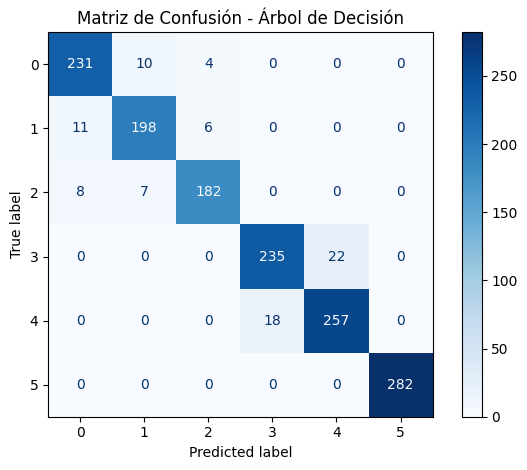

✅ F1-score (macro) del Árbol de Decisión: 0.9399


In [7]:
# ============================================
# BLOQUE 2 - MODELO 1: ÁRBOL DE DECISIÓN
# ============================================

# Crear y entrenar el modelo
tree_clf = DecisionTreeClassifier(max_depth=10, class_weight='balanced', random_state=42)
tree_clf.fit(X_train_scaled, y_train_split)

# Realizar predicciones
y_pred_tree = tree_clf.predict(X_test_scaled)

# Evaluación de métricas
print("🔍 Reporte de Clasificación - Árbol de Decisión:")
print(classification_report(y_test_split, y_pred_tree))

# Matriz de confusión
cm_tree = confusion_matrix(y_test_split, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp_tree.plot(cmap='Blues')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.tight_layout()
plt.savefig('../results/matriz_confusion_arbol_decision.png')
plt.show()

# Guardar F1-score para clase promedio (macro)
f1_tree = f1_score(y_test_split, y_pred_tree, average='macro')
print(f"✅ F1-score (macro) del Árbol de Decisión: {f1_tree:.4f}")


🔍 Reporte de Clasificación - SVM:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       245
           2       1.00      1.00      1.00       215
           3       0.99      1.00      1.00       197
           4       0.93      0.95      0.94       257
           5       0.96      0.93      0.94       275
           6       1.00      1.00      1.00       282

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



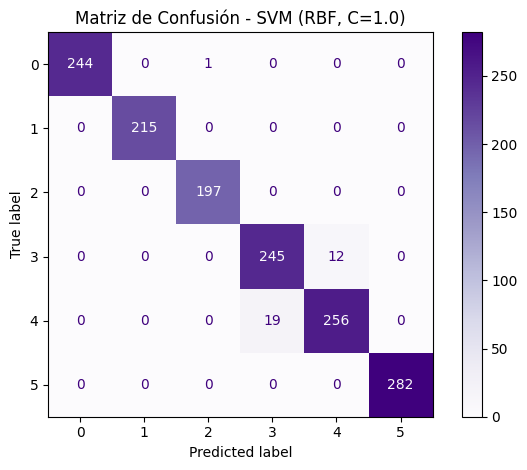

✅ F1-score (macro) de SVM: 0.9798


In [8]:
# ============================================
# BLOQUE 3 - MODELO 2: SVM (KERNEL RBF, C=1.0)
# ============================================

# Crear y entrenar el modelo SVM
svm_clf = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)
svm_clf.fit(X_train_scaled, y_train_split)

# Realizar predicciones
y_pred_svm = svm_clf.predict(X_test_scaled)

# Evaluación
print("🔍 Reporte de Clasificación - SVM:")
print(classification_report(y_test_split, y_pred_svm))

# Matriz de confusión
cm_svm = confusion_matrix(y_test_split, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Purples')
plt.title('Matriz de Confusión - SVM (RBF, C=1.0)')
plt.tight_layout()
plt.savefig('../results/matriz_confusion_svm_rbf.png')
plt.show()

# Guardar F1-score
f1_svm = f1_score(y_test_split, y_pred_svm, average='macro')
print(f"✅ F1-score (macro) de SVM: {f1_svm:.4f}")


🔍 Reporte de Clasificación - Regresión Logística:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       245
           2       1.00      1.00      1.00       215
           3       1.00      1.00      1.00       197
           4       0.95      0.94      0.94       257
           5       0.94      0.95      0.95       275
           6       1.00      1.00      1.00       282

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



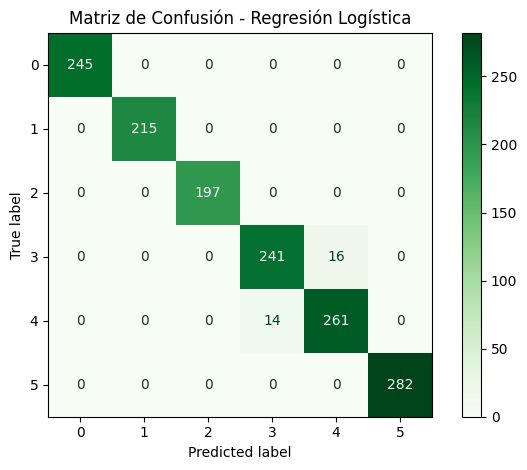

✅ F1-score (macro) de Regresión Logística: 0.9812


In [10]:
# ============================================
# BLOQUE 4 - MODELO 3: REGRESIÓN LOGÍSTICA (CORREGIDO)
# ============================================

# Crear y entrenar el modelo (sin multi_class)
logreg_clf = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=42)
logreg_clf.fit(X_train_scaled, y_train_split)

# Realizar predicciones
y_pred_log = logreg_clf.predict(X_test_scaled)

# Evaluación
print("🔍 Reporte de Clasificación - Regresión Logística:")
print(classification_report(y_test_split, y_pred_log))

# Matriz de confusión
cm_log = confusion_matrix(y_test_split, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp_log.plot(cmap='Greens')
plt.title('Matriz de Confusión - Regresión Logística')
plt.tight_layout()
plt.savefig('../results/matriz_confusion_logistica.png')
plt.show()

# Guardar F1-score
f1_log = f1_score(y_test_split, y_pred_log, average='macro')
print(f"✅ F1-score (macro) de Regresión Logística: {f1_log:.4f}")


📊 Comparación de Modelos (ordenados por F1-score):
                Modelo  F1-Score (Macro)
2  Regresión Logística          0.981176
1            SVM (RBF)          0.979805
0    Árbol de Decisión          0.939894


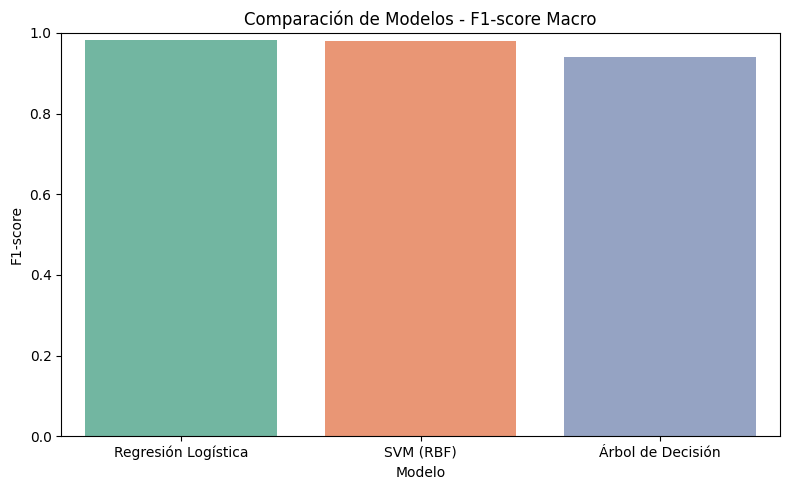

In [12]:
# ============================================
# BLOQUE 5 - COMPARACIÓN DE MODELOS
# ============================================

# Crear un DataFrame con los F1-scores macro
comparacion_modelos = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'SVM (RBF)', 'Regresión Logística'],
    'F1-Score (Macro)': [f1_tree, f1_svm, f1_log]
})

# Mostrar tabla ordenada por F1-score
comparacion_modelos = comparacion_modelos.sort_values(by='F1-Score (Macro)', ascending=False)
print("📊 Comparación de Modelos (ordenados por F1-score):")
print(comparacion_modelos)

# Gráfico de barras (con ajuste para evitar FutureWarning de Seaborn)
plt.figure(figsize=(8, 5))
sns.barplot(data=comparacion_modelos, x='Modelo', y='F1-Score (Macro)', hue='Modelo', palette='Set2', legend=False)
plt.title('Comparación de Modelos - F1-score Macro')
plt.ylabel('F1-score')
plt.xlabel('Modelo')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('../results/comparacion_modelos_f1score.png')
plt.show()